# Warm Up and Data Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Decision Tree 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [3]:
task_features = pd.DataFrame.from_csv('google_search_dataset.tsv',sep='\t',header=0, parse_dates=True).reset_index()
task_features.sample(10)

,PageId,SearchTerm,Timestamp,ClickIndex,Rank,Domain,Position,CountryId
40140,91b5615a-f264-4422-9151-8269398bc395,apple iphone 5 price,2005-06-03 17:00:43.019915,0.000885,2,vodafone.co.nz,topAd,18
27949,cebbd527-9ec3-4e54-a08d-38c95a006e21,apple iphone 3g,2012-01-21 01:11:35.617340,0.554914,5,apple.com,organicRes,6
120400,b11c2f1a-4644-4b79-a494-9f0899159d29,how to buy apple stocks uk,2005-03-14 12:00:35.347469,0.002778,7,about.com,rightAd,2
64823,88110277-35bd-4569-ab1e-0cedb3039855,apple phones prices,2014-08-15 21:38:27.268305,0.247398,8,gsmarena.com,organicRes,14
110609,dfe14a66-bfbe-4699-b316-cc9e79e68903,can i invest in apple,2009-07-31 19:07:10.585613,0.021195,1,fortune.com,organicRes,2
116641,322a24c3-f50a-4563-9edd-48670e8aac97,how much to buy a share in apple,2004-03-13 14:49:27.468617,0.002199,3,selftrade.co.uk,rightAd,2
94731,3b7465b1-cb73-40a3-918a-a6c6f7135083,buy apple shares in the uk,2009-04-08 09:04:17.539607,0.113462,1,markets.com,rightAd,2
142800,7ba6b90a-e86d-4e7b-9c07-bd7734261098,trade apple shares,2016-01-04 07:53:48.822946,0.011947,7,jctrading.info,rightAd,6
129193,2b617c1e-3d59-4345-9825-700d6030219c,iphone 4s apple,2015-01-31 14:21:27.691564,0.240178,10,optus.com.au,organicRes,6
34003,13dae225-718a-4d51-b9ea-c0e60573407e,apple iphone 4g,2007-11-23 21:29:45.474879,0.326713,4,webcrawler.com,rightAd,6


In [4]:
task_features['Timestamp'] = pd.to_datetime(task_features['Timestamp'])
task_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144652 entries, 0 to 144651
Data columns (total 8 columns):
PageId        144652 non-null object
SearchTerm    144652 non-null object
Timestamp     144652 non-null datetime64[ns]
ClickIndex    144652 non-null float64
Rank          144652 non-null int64
Domain        144652 non-null object
Position      144652 non-null object
CountryId     144652 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 8.8+ MB


In [5]:
apple_iphone = task_features[task_features['SearchTerm']=='apple iphone'][['PageId','Timestamp','ClickIndex']]
apple_iphone_2 = pd.DataFrame(apple_iphone.groupby([apple_iphone['PageId'],apple_iphone.Timestamp.map(lambda\
                        t: datetime.datetime(t.year, t.month, t.day))])['ClickIndex'].sum()).reset_index()
apple_iphone_2.rename(columns={'ClickIndex':'SumClickIndex'}, inplace=True)
apple_iphone_2 = apple_iphone_2.sort_values('Timestamp')
apple_iphone_2.head(2)

,PageId,Timestamp,SumClickIndex
121,c2ee268c-1e61-403a-adb7-345d6ff9a6a7,2004-01-11,0.02147
103,a28c0a3a-9966-48bb-93d7-bbbf7c2bd993,2004-04-13,0.01569


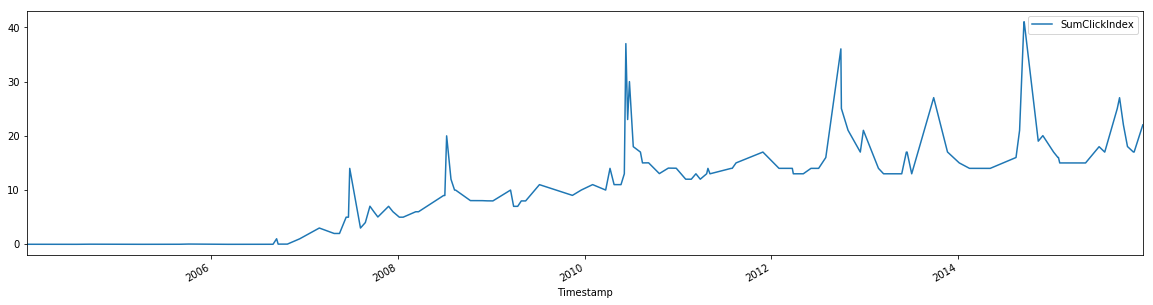

In [6]:
apple_iphone_2.plot(x='Timestamp',y='SumClickIndex',figsize=(20,5))
plt.show()

In [7]:
# Same process for 'buy apple stocks online'
stocks = task_features[task_features['SearchTerm']=='buy apple stocks online'][['PageId','Timestamp','ClickIndex']]
stocks_2 = pd.DataFrame(stocks.groupby([stocks['PageId'],stocks.Timestamp.map(lambda\
                        t: datetime.datetime(t.year, t.month, t.day))])['ClickIndex'].sum()).reset_index()
stocks_2.rename(columns={'ClickIndex':'SumClickIndex'}, inplace=True)
stocks_2 = stocks_2.sort_values('Timestamp')
stocks_2.head(2)

,PageId,Timestamp,SumClickIndex
1,75b8bad4-971d-41d3-83b6-7735127277a2,2004-12-10,0.071790
5,f1691211-c893-4188-ad45-86a633564af5,2006-09-24,0.170169


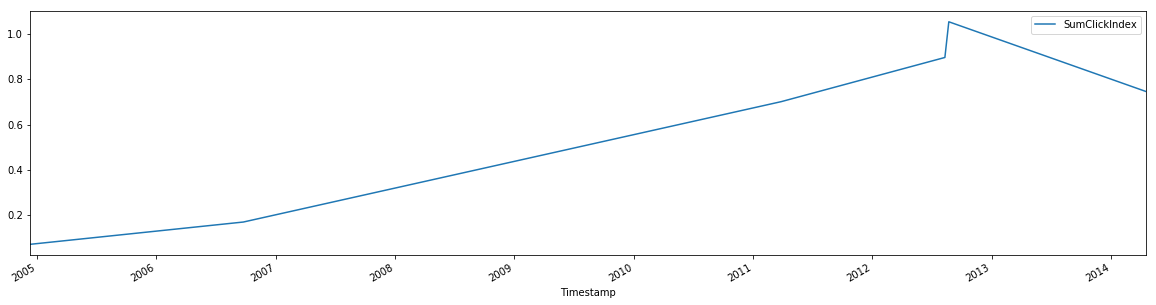

In [8]:
stocks_2.plot(x='Timestamp',y='SumClickIndex',figsize=(20,5))
plt.show()

In [9]:
# Getting domain names for specific results, for example:

domains = task_features[(task_features['SearchTerm']=='apple recipes')&(task_features['Position']=='organicRes')]\
            ['Domain'].drop_duplicates()
domains

68842                bbc.co.uk
68843          bbcgoodfood.com
68844      bramleyapples.co.uk
68845    greatbritishchefs.com
68846         allrecipes.co.uk
68847         goodtoknow.co.uk
68848          foodnetwork.com
68849          theguardian.com
68850          telegraph.co.uk
68851        countryliving.com
68852             taste.com.au
68853        allrecipes.com.au
68855      aussieapples.com.au
68856        marthastewart.com
68858        simplyrecipes.com
68860      custardapple.com.au
68870            thekitchn.com
69307          tasteofhome.com
Name: Domain, dtype: object

In [10]:
# Top 10 domains for all searches
# Each domain counts 1 time for each pageid
task_features_2 = task_features.drop_duplicates(subset=['PageId','Domain'])
top_domains = pd.DataFrame(task_features_2.groupby('Domain')['Domain'].count())
top_domains.rename(columns={'Domain':'Count'}, inplace=True)
top_domains = (top_domains.reset_index()).sort_values('Count', ascending=False)
top_domains.head(10)

,Domain,Count
66,apple.com,6052
495,ig.com,2974
637,marketwatch.com,2913
437,gsmarena.com,2461
719,ndtv.com,2421
76,ask.com,2350
1014,taste.com.au,2205
1191,yahoo.com,2176
16,about.com,1947
467,hl.co.uk,1828


# Preparing Dataset to Model

In [11]:
# Dropping off ID column, because it is meaningless to the model.
task_features = task_features.drop('PageId',axis=1)

In [12]:
# Dealing with Timestamps, converting them into individual columns like week, hour, year...
dates = task_features['Timestamp']
task_features = task_features.drop('Timestamp',1)
dates_2 = pd.DataFrame({"year": dates.dt.year,
              "month": dates.dt.month,
              "day": dates.dt.day,
              "hour": dates.dt.hour,
              "dayofyear": dates.dt.dayofyear,
              "week": dates.dt.week,
              "weekofyear": dates.dt.weekofyear,
              "dayofweek": dates.dt.dayofweek,
              "weekday": dates.dt.weekday,
              "quarter": dates.dt.quarter,
             })
task_features = pd.concat([task_features,dates_2],1)

In [13]:
# Dummies for SearchTerm
search_term_dummies = pd.get_dummies(task_features['SearchTerm'])
task_features = pd.concat([task_features,search_term_dummies],axis=1)
task_features = task_features.drop('SearchTerm',1)

In [14]:
# Dummies for Domain
domain_dummies = pd.get_dummies(task_features['Domain'])
task_features = pd.concat([task_features,domain_dummies],axis=1)
task_features = task_features.drop('Domain',1)

In [15]:
# Dummies for Position
position_dummies = pd.get_dummies(task_features['Position'])
task_features = pd.concat([task_features,position_dummies],axis=1)
task_features = task_features.drop('Position',1)

In [16]:
# Dummies for CountryId
countryid_dummies = pd.get_dummies(task_features['CountryId'])
task_features = pd.concat([task_features,countryid_dummies],axis=1)
task_features = task_features.drop('CountryId',1)

In [17]:
task_features.shape

(144652, 1752)

# Decision Tree Algorithm

In [18]:
y = task_features['ClickIndex']
X = task_features.drop('ClickIndex',1)
X_np = np.array(X)
y_np = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.30, random_state=0)
y_actual = y_test

In [19]:
model = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Squared Error : ', mean_squared_error(y_actual,y_pred))
print('Root of MSE : ', mean_squared_error(y_actual,y_pred)**(1/2))
print('R2 Score : ', r2_score(y_actual,y_pred))

Mean Squared Error :  0.0722457655101
Root of MSE :  0.268785724156
R2 Score :  0.707271958391


In [20]:
features = sorted(list(zip(X.columns, model.feature_importances_)), key=lambda x:x[1], reverse=True)
df_features = pd.DataFrame(features)
df_features.head()

,0,1
0,Rank,0.153868
1,year,0.142944
2,dayofyear,0.063298
3,apple.com,0.060599
4,gsmarena.com,0.047676


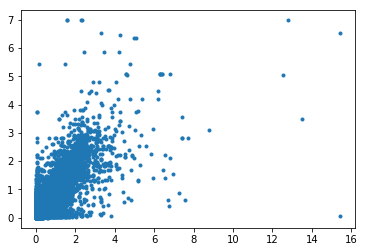

In [21]:
plt.scatter(y_test, y_pred,marker='.')
plt.show()